In [2]:
import stumpy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import argrelextrema
from datetime import timedelta

In [3]:
data = pd.read_csv('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/15-16/sleepPD.csv')
data['t'] = pd.to_datetime(data['t'])
data.head()

,t,x,y,z,classification,arm_angle,change
0,2021-03-15 23:00:00.002,-0.480,0.672,-0.608,Sleep,-36.361803,1.413318
1,2021-03-15 23:00:00.042,-0.480,0.672,-0.640,Sleep,-37.775121,-1.413318
2,2021-03-15 23:00:00.072,-0.512,0.704,-0.608,Sleep,-34.932524,2.842597
3,2021-03-15 23:00:00.112,-0.512,0.640,-0.672,Sleep,-39.348746,-4.416223
4,2021-03-15 23:00:00.142,-0.480,0.704,-0.640,Sleep,-36.910790,2.437956


In [4]:
data1 = data[data.classification != 'Wake']
data1 = data1.reset_index(drop=True)
#data1['t'] = data1['t'].astype('datetime64[s]')
#data1 = data1.groupby('t', as_index=False)['arm_angle'].mean()
data1.head()

,t,x,y,z,classification,arm_angle,change
0,2021-03-15 23:00:00.002,-0.480,0.672,-0.608,Sleep,-36.361803,1.413318
1,2021-03-15 23:00:00.042,-0.480,0.672,-0.640,Sleep,-37.775121,-1.413318
2,2021-03-15 23:00:00.072,-0.512,0.704,-0.608,Sleep,-34.932524,2.842597
3,2021-03-15 23:00:00.112,-0.512,0.640,-0.672,Sleep,-39.348746,-4.416223
4,2021-03-15 23:00:00.142,-0.480,0.704,-0.640,Sleep,-36.910790,2.437956


In [5]:
def sleep_interuptions(df):
    sleep_interuptions = []
    for i in range(len(df)-1):
        if (df['t'].iloc[i+1] - df['t'].iloc[i]) > timedelta(minutes=5):
            sleep_interuptions.append(i)
        else:
            pass
    return sleep_interuptions

In [6]:
sleep_interuptions = sleep_interuptions(data1)
print(sleep_interuptions)

[82703, 98671, 481903]


In [7]:
m = 22500
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps['arm_angle'] = sp.gpu_stump(data1['arm_angle'], m)
mps_list = mps['arm_angle'][:, 0].tolist()
mps_array = np.array(mps_list)
mps_round = np.around(mps_array, 4)

In [8]:
n = 22500  # number of points to be checked before and after

# Find local peaks
df = pd.DataFrame(mps_round, columns=['data'])
df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal,
                    order=n)[0]]['data']
df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal,
                    order=n)[0]]['data']

# Plot results
plt.figure(figsize=(20, 7.5))
plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['data'])
plt.ylabel('Euclidian Distance', fontsize='20')
plt.xlabel('Value Index in TimeSeries', fontsize='20')
plt.title('Matrix Profile', fontsize='30')
#plt.savefig('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/17-18/PD_MP/MatrixProfile_25Hz')
plt.show()

KeyboardInterrupt: 

In [98]:
motifs_df = df['min'].dropna()
motifs_df = motifs_df.reset_index()
motifs_df = motifs_df.sort_values(by=['min'])
motifs_df

,index,min
7,374653,4.1907
8,452073,4.1907
5,292308,20.9469
1,37892,27.2561
2,77856,51.9993
9,508010,55.1805
4,208860,62.8687
0,1489,88.8086
6,343756,99.4320
3,180184,99.9819


In [99]:
searchval = 20.9469
ii = np.where(mps_round == searchval)[0]
print(ii)

[292308 432178]


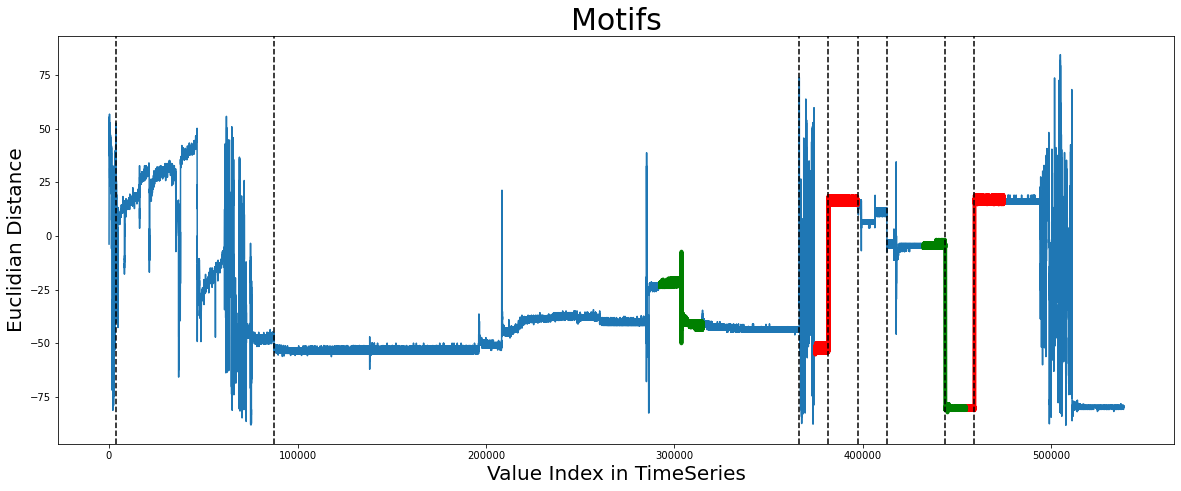

In [100]:
fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20, 7.5))

axs.set_ylabel('Euclidian Distance', fontsize='20')
axs.plot(data1['arm_angle'])
axs.set_xlabel('Value Index in TimeSeries', fontsize ='20')

axs.plot(data1['arm_angle'].iloc[374653:374653+m], c='red', linewidth=4)
axs.plot(data1['arm_angle'].iloc[452073:452073+m], c='red', linewidth=4)
axs.plot(data1['arm_angle'].iloc[292308:292308+m], c='green', linewidth=4)
axs.plot(data1['arm_angle'].iloc[432178:432178+m], c='green', linewidth=4)
#axs.plot(data1['arm_angle'].iloc[450891:450891+m], c='orange', linewidth=4)
#axs.plot(data1['arm_angle'].iloc[504677:504677+m], c='orange', linewidth=4)
plt.title('Motifs', fontsize='30')

for idx in sleep_interuptions:
    axs.axvline(x=idx, linestyle="dashed", c='black')
#plt.savefig('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/17-18/PD_MP/motifs_25Hz')

In [101]:
discords_df = df['max'].dropna()
discords_df = discords_df.reset_index()
discords_df = discords_df.sort_values(by=['max'])
discords_df

,index,max
0,13236,149.3440
5,229586,172.3307
1,65473,175.9893
8,421143,181.2100
7,338909,201.2344
2,115810,201.6853
6,262519,202.1564
3,140404,204.1087
4,140405,204.1087
9,463680,208.1733


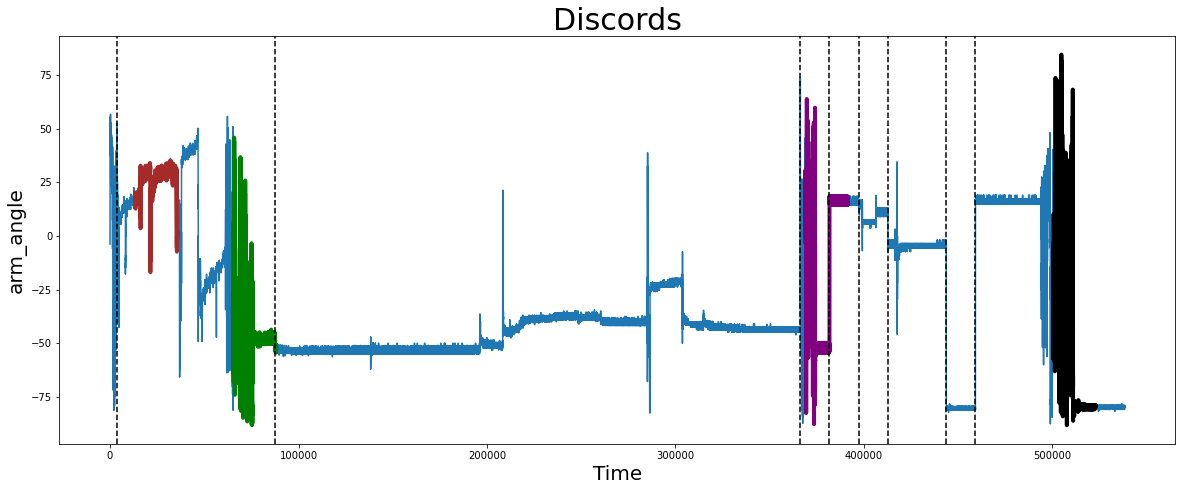

In [106]:
fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20, 7.5))

axs.set_ylabel('arm_angle', fontsize='20')
axs.plot(data1['arm_angle'])
axs.set_xlabel('Time', fontsize ='20')

axs.plot(data1['arm_angle'].iloc[65473:65473+m], c='green', linewidth=4)
axs.plot(data1['arm_angle'].iloc[368909:368909+m], c='purple', linewidth=4)
axs.plot(data1['arm_angle'].iloc[13236:13236+m], c='brown', linewidth=4)
axs.plot(data1['arm_angle'].iloc[500463:500463+m], c='black', linewidth=4)
plt.title('Discords', fontsize='30')
for idx in sleep_interuptions:
    axs.axvline(x=idx, linestyle="dashed", c='black')
#plt.savefig('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/17-18/PD_MP/discords_25Hz')

In [20]:
time_dict ={
  "5 min": 7500,
  "10 min": 2250,
  "15 min": 22500,
}

time_df = pd.DataFrame.from_dict(time_dict, orient='index', columns=['m'])
time_df = time_df.reset_index()

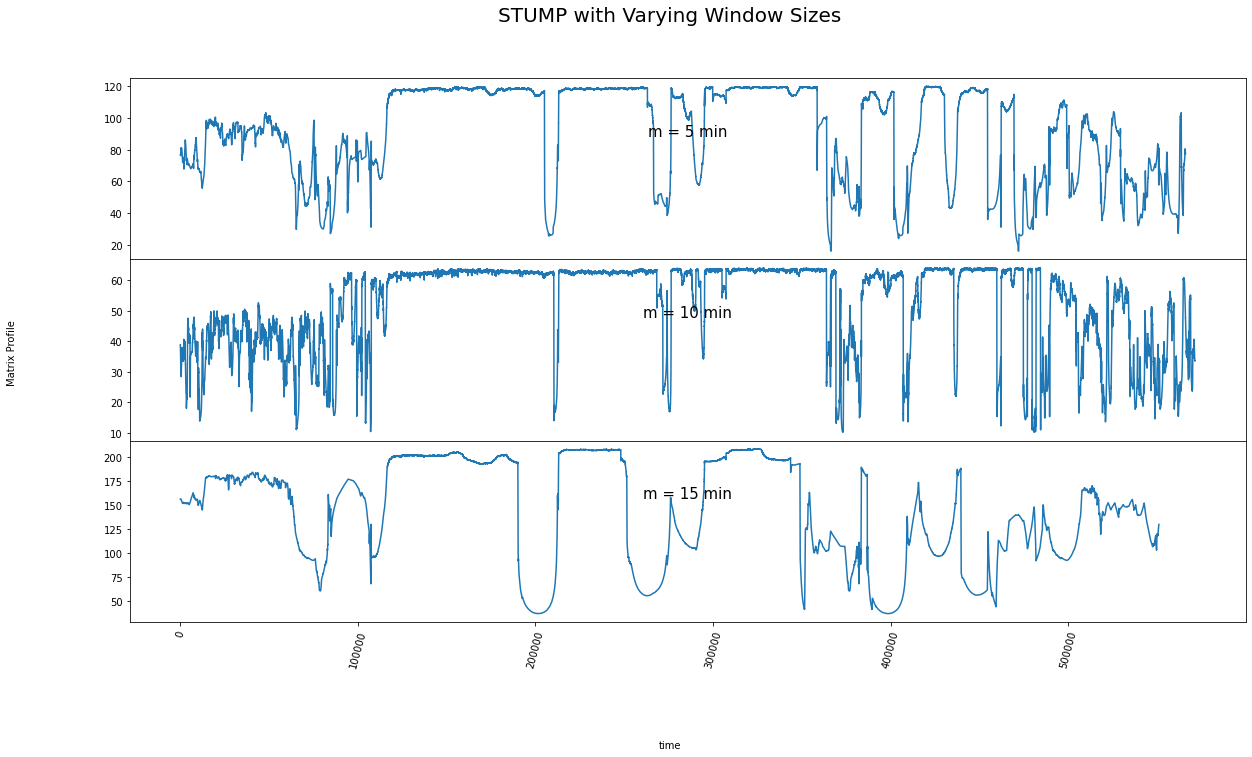

In [21]:
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20, 10))
fig.text(0.5, -0.05, 'time', ha='center', fontsize='10')
fig.text(0.04, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='10')
for i, varying_m in enumerate(time_df['m'].values):
    mp = sp.gpu_stump(data1['arm_angle'], varying_m)
    axs[i].plot(mp[:, 0])
    title = f"m = {time_df['index'][i]}"
    axs[i].set_title(title, fontsize=15, y=.65)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='20')
#plt.savefig('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/15-16/MP_varrying_window')
plt.show()